# Step 1: Minimal Octo Inference Example

This Colab demonstrates how to load a pre-trained / finetuned Octo checkpoint, run inference on some offline images and compare the outputs to the true actions.

First, let's start with a minimal example!

In [1]:


# Download repo
!git clone https://github.com/octo-models/octo.git
%cd octo
# Install repo
!pip3 install -e .
!pip3 install -r requirements.txt
# !pip3 install --upgrade "jax[cuda11_pip]==0.4.20" -f https://storage.googleapis.com/jax-releases/jax_cuda_releases.html
# !pip install numpy==1.21.1 # to fix colab AttributeError: module 'numpy' has no attribute '_no_nep50_warning', if the error still shows reload

Cloning into 'octo'...
remote: Enumerating objects: 7382, done.
remote: Counting objects: 100% (1064/1064), done.
remote: Compressing objects: 100% (126/126), done.
remote: Total 7382 (delta 981), reused 938 (delta 938), pack-reused 6318 (from 1)
Receiving objects: 100% (7382/7382), 23.75 MiB | 17.76 MiB/s, done.
Resolving deltas: 100% (4768/4768), done.
/content/octo
Obtaining file:///content/octo
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for octo (pyproject.toml) ... done
  Created wheel for octo: filename=octo-0.0.0-0.editable-py3-none-any.whl size=3425 sha256=66e284bec859c5df37667442e75f4d029c14dcef76bbf6cc4342be46b7389372
  Stored in directory: /tmp/pip-ephem-wheel-cache-qd142qks/wheels/0d/9c/f1/453c81891d38b9e05d44a69862f8986d86122a1aff20172a93
Successfully built octo
  Cloning https://github.com/

In [2]:
%%capture
!pip install scipy==1.11.0

# Restart Session

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 kB 2.2 MB/s eta 0:00:00
Reason for being yanked: License Violation
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 21.5 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.14.1
    Uninstalling scipy-1.14.1:
      Successfully uninstalled scipy-1.14.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pymc 5.21.2 requires numpy>=1.25.0, but you have numpy 1.24.3 which is incompatible.
albumentations 2.0.5 requires numpy>=1.24.4, but you have numpy 1.24.3 which is incompatible.
scikit-image 0.25.2 requires scipy>=1.11.4, but you have scipy 1.11.0 which is incompatible.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.
dopamine-rl 4.1.2 requires tf-keras>=2.18.0, but you have tf-keras 2.15.1 which is incompatible.


In [2]:
# !pip install jaxlib==0.4.20

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 MB 9.2 MB/s eta 0:00:00
  Attempting uninstall: jaxlib
    Found existing installation: jaxlib 0.4.38
    Uninstalling jaxlib-0.4.38:
      Successfully uninstalled jaxlib-0.4.38
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dopamine-rl 4.1.2 requires gym<=0.25.2, but you have gym 0.26.2 which is incompatible.
dopamine-rl 4.1.2 requires tf-keras>=2.18.0, but you have tf-keras 2.15.1 which is incompatible.


In [2]:
from octo.model.octo_model import OctoModel

model = OctoModel.load_pretrained("hf://rail-berkeley/octo-small")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

ERROR:jax._src.xla_bridge:Jax plugin configuration error: Plugin module %s could not be loaded
Traceback (most recent call last):
  File "/usr/local/lib/python3.11/dist-packages/jax/_src/xla_bridge.py", line 432, in discover_pjrt_plugins
    plugin_module = importlib.import_module(plugin_module_name)
                    ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/usr/lib/python3.11/importlib/__init__.py", line 126, in import_module
    return _bootstrap._gcd_import(name[level:], package, level)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "<frozen importlib._bootstrap>", line 1204, in _gcd_import
  File "<frozen importlib._bootstrap>", line 1176, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1147, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 690, in _load_unlocked
  File "<frozen importlib._bootstrap_external>", line 940, in exec_module
  File "<frozen importlib._bootstrap>", line 241, in _call_with_frames_r

In [3]:
print(model.dataset_statistics["bridge_dataset"]['action']['mean'])

[ 0.00021161  0.00012614 -0.00017022 -0.00015062 -0.00023831  0.00025646
  0.        ]


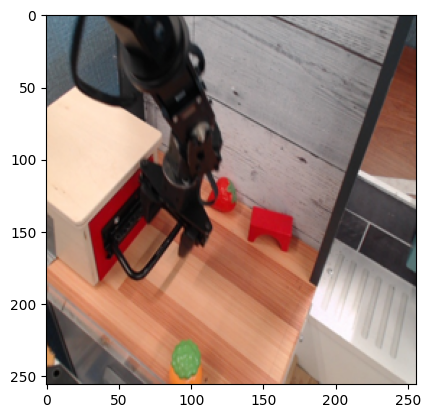

In [4]:
from PIL import Image
import requests
import matplotlib.pyplot as plt
import numpy as np

# download one example BridgeV2 image
IMAGE_URL = "https://rail.eecs.berkeley.edu/datasets/bridge_release/raw/bridge_data_v2/datacol2_toykitchen7/drawer_pnp/01/2023-04-19_09-18-15/raw/traj_group0/traj0/images0/im_12.jpg"
img = np.array(Image.open(requests.get(IMAGE_URL, stream=True).raw).resize((256, 256)))
plt.imshow(img)


In [5]:
# create obs & task dict, run inference
import jax

# add batch + time horizon 1
img = img[np.newaxis,np.newaxis,...]
observation = {"image_primary": img, "timestep_pad_mask": np.array([[True]])}
task = model.create_tasks(texts=["pick up the fork"])
action = model.sample_actions(observation, task, rng=jax.random.PRNGKey(0))
print(action)   # [batch, action_chunk, action_dim]

{'image_primary': Traced<ShapedArray(uint8[1,1,256,256,3])>with<DynamicJaxprTrace(level=1/0)>, 'timestep_pad_mask': Traced<ShapedArray(bool[1,1])>with<DynamicJaxprTrace(level=1/0)>}


[[[ 0.21944962  0.27192098 -1.2483442   1.868253   -0.14852884
   -0.14862898  1.0122118 ]
  [-0.20304038  0.18768138 -0.64463246  0.03979522  0.7787506
    0.3430867   0.92668146]
  [ 0.02429272  0.01729316 -0.11181393 -0.14260808  0.44263685
    0.2776805   0.02671604]
  [-0.26106498 -0.5228219  -0.080629   -2.1537437   0.00470176
    0.28811276  0.01965971]]]


# Step 2: Run Inference on Full Trajectories

That was easy! Now let's try to run inference across a whole trajectory and visualize the results!

In [6]:
!pip install rlds dm-reverb mediapy
import os
os.environ['JAX_PLATFORMS'] = 'cpu' # Force on CPU

import cv2
import jax
import tensorflow as tf
import tensorflow_datasets as tfds
import tqdm
import rlds
import mediapy as media
from PIL import Image
from IPython import display

## Load Model Checkpoint
First, we will load the pre-trained checkpoint using the `load_pretrained()` function. You can simply feed the path to a checkpoint directory or the HuggingFace path of your Octo model of choice.

Below, we are loading directly from HuggingFace.


In [7]:
from octo.model.octo_model import OctoModel

model = OctoModel.load_pretrained("hf://rail-berkeley/octo-small")

Fetching 8 files:   0%|          | 0/8 [00:00<?, ?it/s]

In [13]:
print(model.get_pretty_spec())


This model is trained with a window size of 2, predicting 7 dimensional actions 4 steps into the future.
Observations and tasks conform to the following spec:

Observations: {
    image_primary: ('batch', 'history_window', 256, 256, 3),
    image_wrist: ('batch', 'history_window', 128, 128, 3),
}
Tasks: {
    image_primary: ('batch', 256, 256, 3),
    image_wrist: ('batch', 128, 128, 3),
    language_instruction: {
        attention_mask: ('batch', 16),
        input_ids: ('batch', 16),
    },
}

At inference, you may pass in any subset of these observation and task keys, with a history window up to 2 timesteps.



## Load Datasets
Next, we will load a trajectory from the bridge dataset for testing the model. We will use the publicly available copy in the Open X-Embodiment dataset bucket.

In [8]:
# create RLDS dataset builder
builder = tfds.builder_from_directory(builder_dir='gs://gresearch/robotics/bridge/0.1.0/')
ds = builder.as_dataset(split='train[:1]')

# sample episode + resize to 256x256 (default third-person cam resolution)
episode = next(iter(ds))
print(episode)

steps = list(episode['steps'])
images = [cv2.resize(np.array(step['observation']['image']), (256, 256)) for step in steps]

# extract goal image & language instruction
goal_image = images[-1]
language_instruction = steps[0]['observation']['natural_language_instruction'].numpy().decode()

# visualize episode
print(f'Instruction: {language_instruction}')
media.show_video(images, fps=10)

{'steps': <_VariantDataset element_spec={'action': {'open_gripper': TensorSpec(shape=(), dtype=tf.bool, name=None), 'rotation_delta': TensorSpec(shape=(3,), dtype=tf.float32, name=None), 'terminate_episode': TensorSpec(shape=(), dtype=tf.float32, name=None), 'world_vector': TensorSpec(shape=(3,), dtype=tf.float32, name=None)}, 'is_first': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_last': TensorSpec(shape=(), dtype=tf.bool, name=None), 'is_terminal': TensorSpec(shape=(), dtype=tf.bool, name=None), 'observation': {'image': TensorSpec(shape=(480, 640, 3), dtype=tf.uint8, name=None), 'natural_language_embedding': TensorSpec(shape=(512,), dtype=tf.float32, name=None), 'natural_language_instruction': TensorSpec(shape=(), dtype=tf.string, name=None), 'state': TensorSpec(shape=(7,), dtype=tf.float32, name=None)}, 'reward': TensorSpec(shape=(), dtype=tf.float32, name=None)}>}
Instruction: Place the can to the left of the pot.


## Run Inference

Next, we will run inference over the images in the episode using the loaded model.
Below we demonstrate setups for both goal-conditioned and language-conditioned training.
Note that we need to feed inputs of the correct temporal window size.

In [9]:
WINDOW_SIZE = 2

# create `task` dict
task = model.create_tasks(goals={"image_primary": goal_image[None]})   # for goal-conditioned
task = model.create_tasks(texts=[language_instruction])                # for language conditioned

In [11]:
# run inference loop, this model only uses single image observations for bridge
# collect predicted and true actions
pred_actions, true_actions = [], []
for step in tqdm.tqdm(range(0, len(images) - WINDOW_SIZE + 1)):
    input_images = np.stack(images[step : step + WINDOW_SIZE])[None]
    observation = {
        'image_primary': input_images,
        'timestep_pad_mask': np.array([[True, True]]),
    }

    # this returns *normalized* actions --> we need to unnormalize using the dataset statistics
    norm_actions = model.sample_actions(observation, task, rng=jax.random.PRNGKey(0))
    norm_actions = norm_actions[0]   # remove batch
    actions = (
        norm_actions * model.dataset_statistics["bridge_dataset"]['action']['std']
        + model.dataset_statistics["bridge_dataset"]['action']['mean']
    )

    pred_actions.append(actions)
    true_actions.append(np.concatenate(
        (
            steps[step+1]['action']['world_vector'],
            steps[step+1]['action']['rotation_delta'],
            np.array(steps[step+1]['action']['open_gripper']).astype(np.float32)[None]
        ), axis=-1
    ))

  0%|          | 0/37 [00:00<?, ?it/s]WARNING:root:'observations' is missing items compared to example_batch: {'timestep', 'pad_mask_dict/timestep', 'proprio', 'pad_mask', 'pad_mask_dict/image_primary', 'pad_mask_dict/proprio', 'image_wrist', 'pad_mask_dict/image_wrist'}


{'image_primary': Traced<ShapedArray(uint8[1,2,256,256,3])>with<DynamicJaxprTrace(level=1/0)>, 'timestep_pad_mask': Traced<ShapedArray(bool[1,2])>with<DynamicJaxprTrace(level=1/0)>}


100%|██████████| 37/37 [00:50<00:00,  1.37s/it]


## Visualize predictions and ground-truth actions

Finally, we will visualize the predicted actions in comparison to the groundtruth actions.

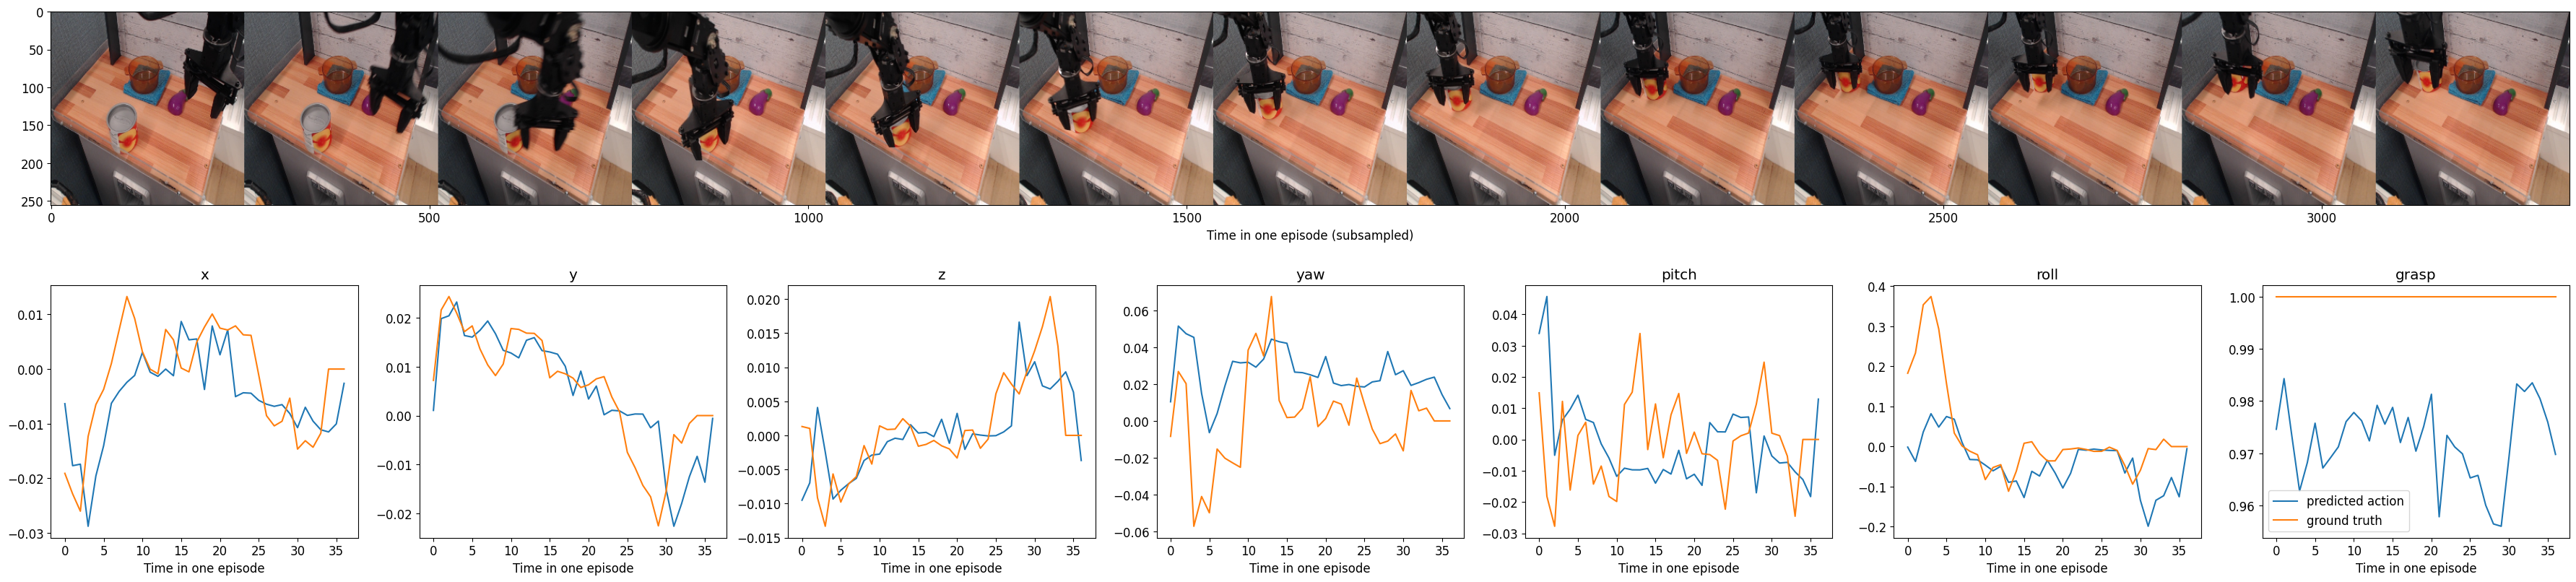

In [12]:
import matplotlib.pyplot as plt

ACTION_DIM_LABELS = ['x', 'y', 'z', 'yaw', 'pitch', 'roll', 'grasp']

# build image strip to show above actions
img_strip = np.concatenate(np.array(images[::3]), axis=1)

# set up plt figure
figure_layout = [
    ['image'] * len(ACTION_DIM_LABELS),
    ACTION_DIM_LABELS
]
plt.rcParams.update({'font.size': 12})
fig, axs = plt.subplot_mosaic(figure_layout)
fig.set_size_inches([45, 10])

# plot actions
pred_actions = np.array(pred_actions).squeeze()
true_actions = np.array(true_actions).squeeze()
for action_dim, action_label in enumerate(ACTION_DIM_LABELS):
  # actions have batch, horizon, dim, in this example we just take the first action for simplicity
  axs[action_label].plot(pred_actions[:, 0, action_dim], label='predicted action')
  axs[action_label].plot(true_actions[:, action_dim], label='ground truth')
  axs[action_label].set_title(action_label)
  axs[action_label].set_xlabel('Time in one episode')

axs['image'].imshow(img_strip)
axs['image'].set_xlabel('Time in one episode (subsampled)')
plt.legend()